<table>
<tbody>
<tr>
<td width="80">&nbsp;</td>
<td width="20">&nbsp;</td>
</tr>
<tr>
<td>
<p style="color: #004571; font-size: 26px; width: 80%; background-color: white;"><strong>THE MUTUAL FUNDS OFFERED BY MAJOR SPANISH BANKS GENERATES ALFA?</strong></p>
<p style="color: #004571; font-size: 26px; width: 80%; background-color: white;"><span style="color: #E57200;"><strong>JAVIER CHOLBI DOBLADO</strong></span></p>
</td>
<td><img style="background-color: white;" title="Naturgy" src="https://e00-expansion.uecdn.es/assets/multimedia/imagenes/2019/07/04/15622253580218.jpg" alt="Alt text that describes the graphic" width="256" height="256" align="right" /></td>
</tr>
</tbody>
</table>

## <font color=#004571> Applied Data Science Capstone by IBM/Coursera

##  <font color=#E57200>Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

# <font color=#004571> Introduction: Business Problem <a name="introduction"></a>

In this project we will try to analyse if the "active" mutual funds offered by the major spanish banks **generates alpha (obtain better results vs benchmark) in a consistent way along the time**, in other words if it's worth to pay highers commisions for buy this mutual funds before to buy ETFs. 

Our main objective its to **show with data if the active management in the mutual funds industry works properly** and try to answer several questions like:

* Can the active mutual funds management by the major banks generates alfa?

* Its better the performance in the active management vs the pasive management?

We will use our data science powers to generate a stadistical and visual analyse using some machine learning techniques as Linear and Multiple Regression. 

# <font color=#004571> Data and packages <a name="data"></a>

Based on definition of our problem, data that will influence in our analysis are:

* End of day historical prices of main mutual funds offered by spanish major banks from 2001 until now.

* End of day historical prices of main index, for Europe market: EuroStoxx 50 Index.

The source of all the data used in the analysis its provided by Bloomberg across xlsx files.

In [1]:
# The packages that we will need to use are:
import matplotlib.pyplot as plt
import math
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.gridspec as gridspec
import os
import seaborn as sns
import matplotlib.mlab as mlab
import statistics
import sys
from __future__ import print_function
from scipy.stats import pearsonr
from scipy.stats import norm
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib.ticker import FormatStrFormatter
from array import array
import warnings

In [2]:
# For Europe Markets the datasets that we need are:
camino_spot = "C:/Users/00022881/Documents/Phyton Curse-Machine Learning/"
name_file_europe = 'Data_Index_Europe.xlsx'

df_europe_20Y = pd.read_excel(camino_spot + name_file_europe,sheet_name='Index_start')
df_europe_10Y = pd.read_excel(camino_spot + name_file_europe,sheet_name='Index_10')
df_europe_5Y = pd.read_excel(camino_spot + name_file_europe,sheet_name='Index_5')
df_europe_3Y = pd.read_excel(camino_spot + name_file_europe,sheet_name='Index_3')
df_europe_1Y = pd.read_excel(camino_spot + name_file_europe,sheet_name='Index_1')
df_europe_YTD = pd.read_excel(camino_spot + name_file_europe,sheet_name='Index_YTD')
df_europe_corr = pd.read_excel(camino_spot + name_file_europe,sheet_name='CORR')
df_europe_TE = pd.read_excel(camino_spot + name_file_europe,sheet_name='TE')
df_europe_alfa = pd.read_excel(camino_spot + name_file_europe,sheet_name='ALFA_2')
df_europe_sharpe = pd.read_excel(camino_spot + name_file_europe,sheet_name='Sharpe')
df_europe_desvest = pd.read_excel(camino_spot + name_file_europe,sheet_name='DESVEST')

#  <font color=#004571> Methodology <a name="methodology"></a>

**In this project we will direct our efforts in two principal axis:**

* Make a deep statistical analysis to show if there are enough evidences to affirm if spanish mutual fund management by major banks are ables to generate alfa across the time and not only in a shor period of time.

* Make a deep visualization job using different kind of charts to ilustrate and majke easy to understand our conclusions.

**Speaking about statistical techniques we are focus in:**

* Correlation historical analysis
* Pearson coeficient 
* Matrix Correlation
* Histogram analysis
* Value at Risk
* Linear Regression
* Tracking Error Ratio
* Sharpe Ratio
* Alfa Ratio

**Speaking about visualization we are going to use:**
* Frequency histograms
* Boxplots charts
* Scatter plots
* Bubble plots
* Area plots

**Speaking about Data Science Tecniques we are going to use:**
* Data Wrangling to clean the differents datasets.
* Data Analyst
* Data Modelling

**The analysis has 3 parts:**

* In first place clean the dataset using data wrangling techniques and explore the data using the descriptive statistical.

* Second place, draw differents plots to understand better the information and try to see initials answer to resolve our problems.

* Last part, use a complex stadistical techniques to make a deep analyisis that allow us to get right conclussions based on data.

# <font color=#004571>Analysis: <a name="analysis"></a>

## <font color=#004571> 0. Data Wranggling

In [3]:
df_europe_20Y = df_europe_20Y.dropna()
df_europe_10Y = df_europe_10Y.dropna()
df_europe_5Y = df_europe_5Y.dropna()
df_europe_3Y = df_europe_3Y.dropna()
df_europe_1Y = df_europe_1Y.dropna()
df_europe_YTD = df_europe_YTD.dropna()
df_europe_corr = df_europe_corr.dropna()
df_europe_TE = df_europe_TE.dropna()
df_europe_alfa = df_europe_alfa.dropna()
df_europe_sharpe= df_europe_sharpe.dropna()

* We need to clean the dataset and drop the rows with NaN values,this it's extremely important to avoid strange results or outlier values.
In this specific case there is no NaN values in the differents datasets...

## <font color=#004571> 1. Description information and price evolution about mutual funds in differents periods of time:

## <font color=#E57200>1. From the start:

In [4]:
df_europe_20Y.describe()

EURO STOXX 50  BBVA Equity Europe  POPULAR Equity Europe  \
count    4846.000000         4846.000000            4846.000000   
mean       66.959048           69.665220              75.618418   
std        12.419490           10.985152              13.765811   
min        38.496452           38.390699              42.421048   
25%        57.870963           61.309599              64.325704   
50%        65.413427           70.210175              76.595583   
75%        75.001808           77.238585              87.119095   
max       101.824242          103.147682             103.231942   

       BANKINTER Equity Europe  SANTANDER Equity Europe  BANKIA Equity Europe  \
count              4846.000000              4846.000000           4846.000000   
mean                 83.801033                83.318663             76.566956   
std                  14.763044                18.572788             15.009538   
min                  44.234756                42.139349             40.174531   
25%                  72.156912                68.495932             63.510905   
50%                  83.588699                81.129142             78.354297   
75%                  95.670053                98.014571             89.695775   
max                 117.420704               119.208580            102.970631   

       SABADELL Equity Europe  CAIXABANK Equity Europe  RENTA4 Equity Europe  
count             4846.000000              4846.000000           4846.000000  
mean                69.822159                74.257628            138.906676  
std                 13.251595                14.193857             41.913293  
min                 36.156250                39.954910             62.072124  
25%                 58.956236                62.511279            105.645228  
50%                 71.937135                75.722503            133.283881  
75%                 80.925183                86.164520            167.029488  
max                100.000000               101.739618            230.736353

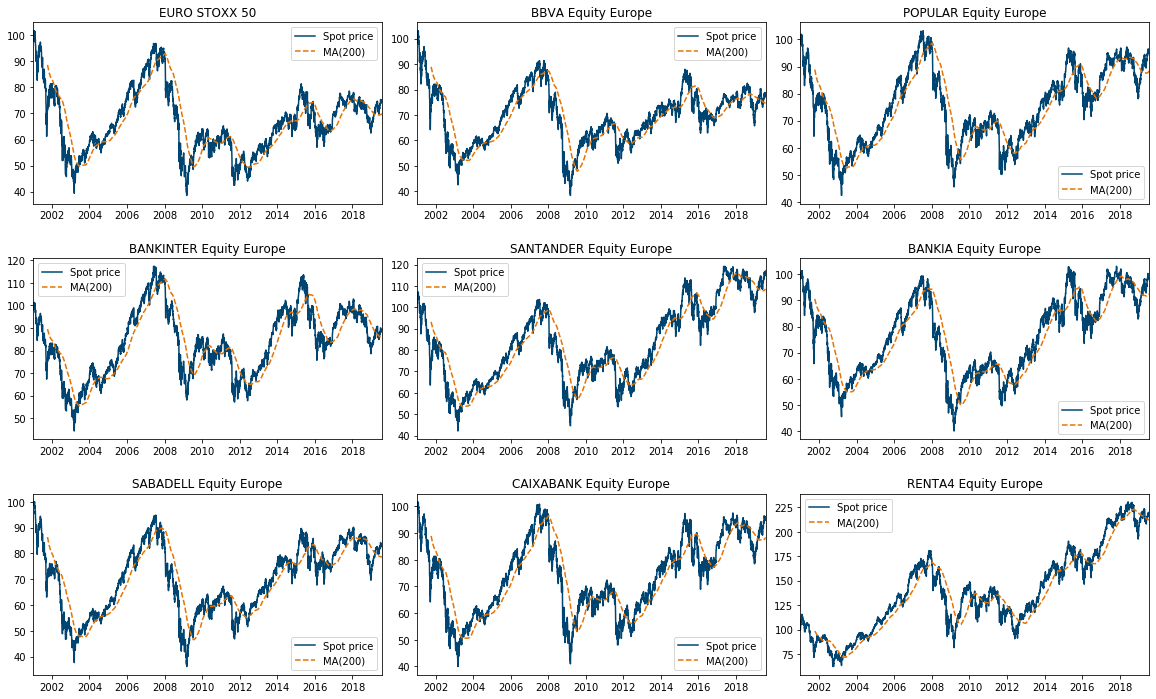

In [5]:
columns_name=df_europe_20Y.columns.values
columns_name_exdate=columns_name[1:10]
data_spot_MA=df_europe_20Y[columns_name_exdate].rolling(200).mean()
fig = plt.figure(figsize=(20,12))
fig.subplots_adjust(hspace=0.3, wspace=0.1)
for i in range(1, 10):
    pos=columns_name[i]
    media=data_spot_MA[pos]
    ax = fig.add_subplot(3, 3,i)
    plt.plot(df_europe_20Y["DATES"],df_europe_20Y.iloc[:,[i]],'#004571',label='Spot price')
    plt.plot(df_europe_20Y["DATES"],media,'#E57200',linestyle='--',label="MA(200)")
    plt.legend(loc='best')
    plt.margins(x=0)
    ax.set_title(columns_name[i])

## <font color=#004571>1.1 All the Indices vs Eurostoxx 50

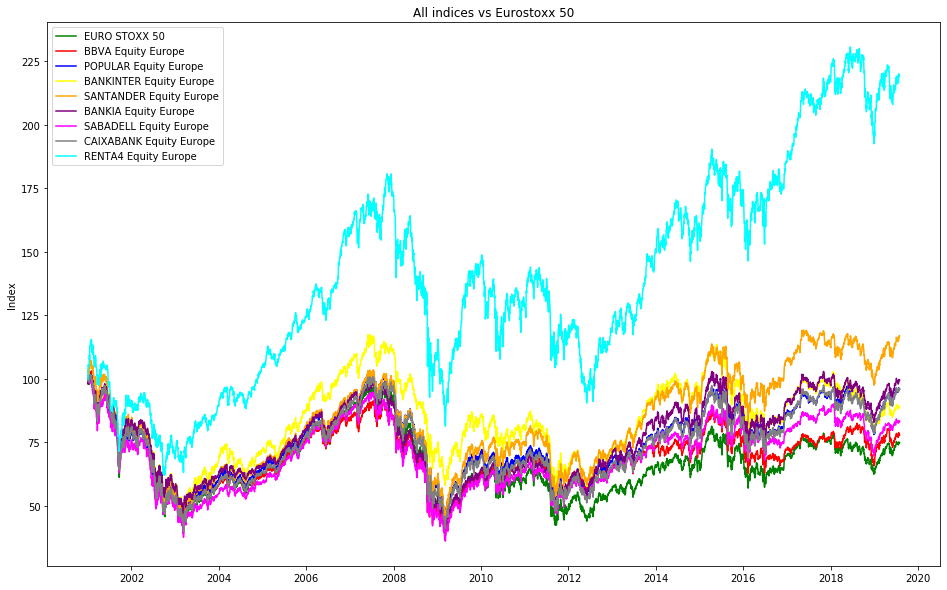

In [6]:
columns_name=df_europe_20Y.columns.values
columns_name_exdate=columns_name[1:10]
fig = plt.figure(figsize=(16,10))
fig.subplots_adjust(hspace=0.3, wspace=0.1)
colors=[0,'green', 'red', 'blue', 'yellow', 'orange', 'purple', 'magenta', 'gray', 'cyan']
              
ax = fig.add_subplot(1, 1,1)
for i in range (1,10):

    plt.plot(df_europe_20Y["DATES"],df_europe_20Y.iloc[:,[i]],colors[i],label=columns_name[i])
    plt.legend(loc='best')
    plt.ylabel('Index')
    plt.title('All indices vs Eurostoxx 50')

## <font color=#E57200>2. Ten Years:

In [7]:
df_europe_10Y.describe()

EURO STOXX 50  BBVA Equity Europe  POPULAR Equity Europe  \
count    2759.000000         2759.000000            2759.000000   
mean      121.766997          141.407016             130.141459   
std        17.089281           18.144406              21.617774   
min        73.948570           79.032734              77.716560   
25%       110.368644          129.597999             113.677873   
50%       122.650166          143.093681             132.352145   
75%       135.766581          154.551166             149.847311   
max       156.428694          181.166051             165.687155   

       BANKINTER Equity Europe  SANTANDER Equity Europe  BANKIA Equity Europe  \
count              2759.000000              2759.000000           2759.000000   
mean                117.301344               147.662285            153.736289   
std                  16.933296                31.978004             31.199430   
min                  78.795528                74.294069             79.252048   
25%                 105.981224               120.162293            125.906447   
50%                 116.909702               153.169413            161.975543   
75%                 131.781276               178.163249            181.622937   
max                 156.700258               198.698602            203.129526   

       SABADELL Equity Europe  CAIXABANK Equity Europe  RENTA4 Equity Europe  
count             2759.000000              2759.000000           2759.000000  
mean               149.795565               135.624213            144.571508  
std                 25.445476                24.073455             35.295105  
min                 76.831649                73.959045             74.415555  
25%                128.425044               117.197459            114.697812  
50%                156.082026               138.374364            141.920086  
75%                171.625384               157.245374            169.636602  
max                191.634979               176.037462            210.895998

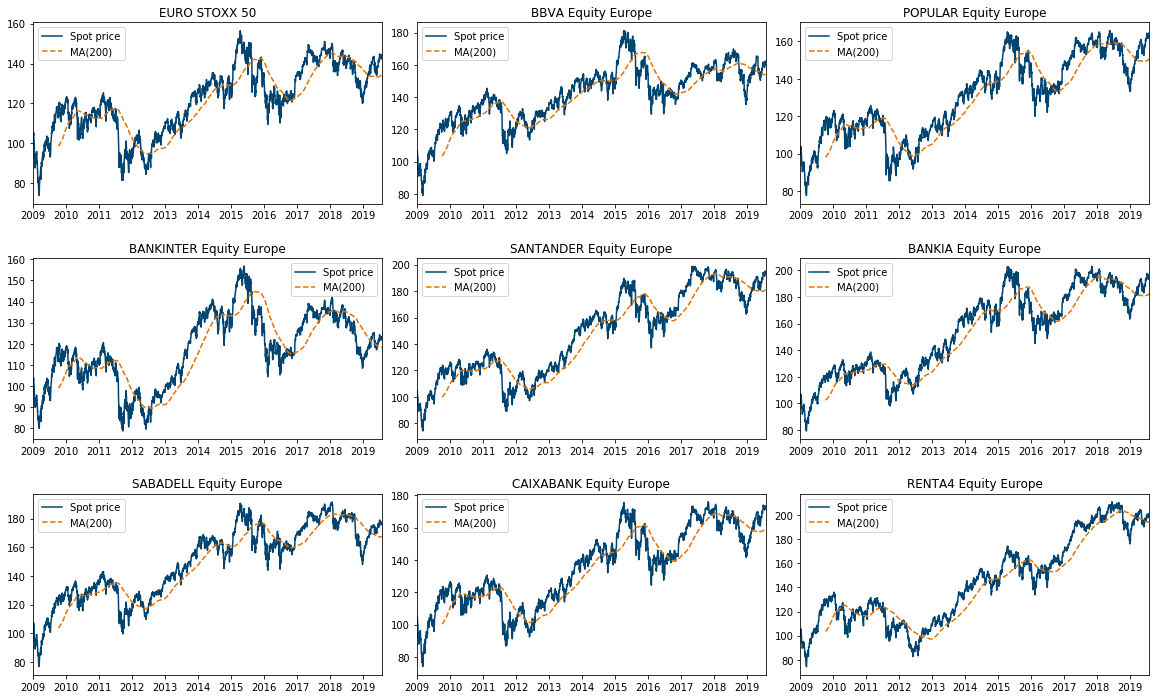

In [8]:
columns_name=df_europe_10Y.columns.values
columns_name_exdate=columns_name[1:10]
data_spot_MA=df_europe_10Y[columns_name_exdate].rolling(200).mean()
fig = plt.figure(figsize=(20,12))
fig.subplots_adjust(hspace=0.3, wspace=0.1)
for i in range(1, 10):
    pos=columns_name[i]
    media=data_spot_MA[pos]
    ax = fig.add_subplot(3, 3,i)
    plt.plot(df_europe_10Y["DATES"],df_europe_10Y.iloc[:,[i]],'#004571',label='Spot price')
    plt.plot(df_europe_10Y["DATES"],media,'#E57200',linestyle='--',label="MA(200)")
    plt.legend(loc='best')
    plt.margins(x=0)
    ax.set_title(columns_name[i])

## <font color=#004571>2.1 All the Indices vs Eurostoxx 50

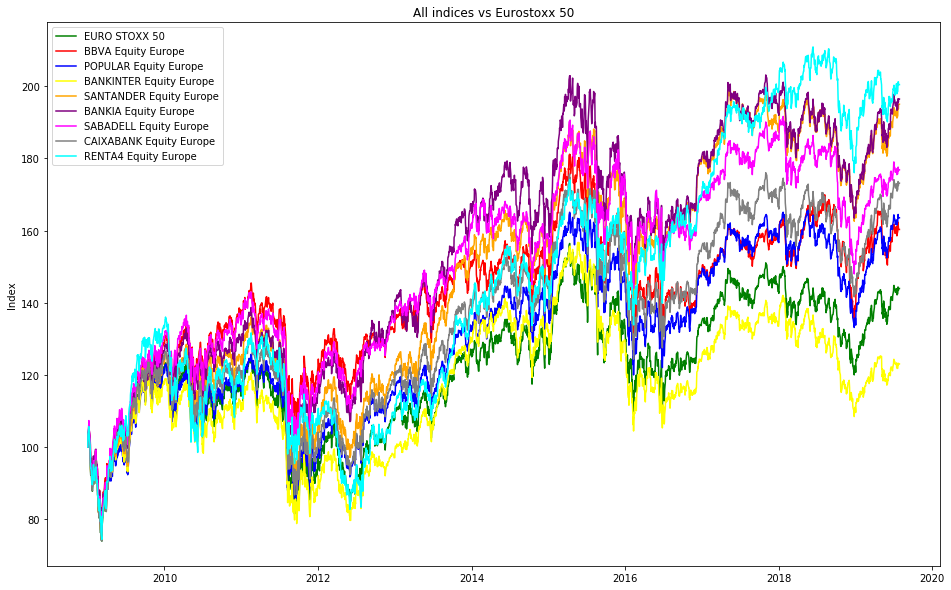

In [9]:
columns_name=df_europe_10Y.columns.values
columns_name_exdate=columns_name[1:10]
fig = plt.figure(figsize=(16,10))
fig.subplots_adjust(hspace=0.3, wspace=0.1)
colors=[0,'green', 'red', 'blue', 'yellow', 'orange', 'purple', 'magenta', 'gray', 'cyan']
              
ax = fig.add_subplot(1, 1,1)
for i in range (1,10):

    plt.plot(df_europe_10Y["DATES"],df_europe_10Y.iloc[:,[i]],colors[i],label=columns_name[i])
    plt.legend(loc='best')
    plt.ylabel('Index')
    plt.title('All indices vs Eurostoxx 50')

## <font color=#E57200>3. Five Years: We are going to make all the statistical analysis with this dataset

In [10]:
df_europe_5Y.describe()

EURO STOXX 50  BBVA Equity Europe  POPULAR Equity Europe  \
count    1455.000000         1455.000000            1455.000000   
mean      106.112509          102.002247             110.795466   
std         7.249717            6.248570               8.002966   
min        86.212609           85.430575              89.941731   
25%       100.078803           97.799600             103.306685   
50%       106.286266          101.620995             111.311250   
75%       111.965584          105.655618             118.294537   
max       123.151496          119.578448             124.179538   

       BANKINTER Equity Europe  SANTANDER Equity Europe  BANKIA Equity Europe  \
count              1455.000000              1455.000000           1455.000000   
mean                 99.385622               112.437137            107.443459   
std                   8.039338                 9.393818              7.748923   
min                  80.154345                88.252796             86.729643   
25%                  92.520953               103.605768            100.351049   
50%                 100.651119               113.838489            107.507482   
75%                 104.223965               120.920629            114.549026   
max                 120.247856               127.942755            121.339517   

       SABADELL Equity Europe  CAIXABANK Equity Europe  RENTA4 Equity Europe  
count             1455.000000              1455.000000           1455.000000  
mean               105.465622               110.231213            125.024887  
std                  6.409257                 8.461517             16.110440  
min                 88.997025                88.287729             96.604173  
25%                 99.998105               102.220813            110.435112  
50%                105.223629               110.628466            121.136936  
75%                111.214672               118.036046            140.465566  
max                118.465386               124.963516            152.405700

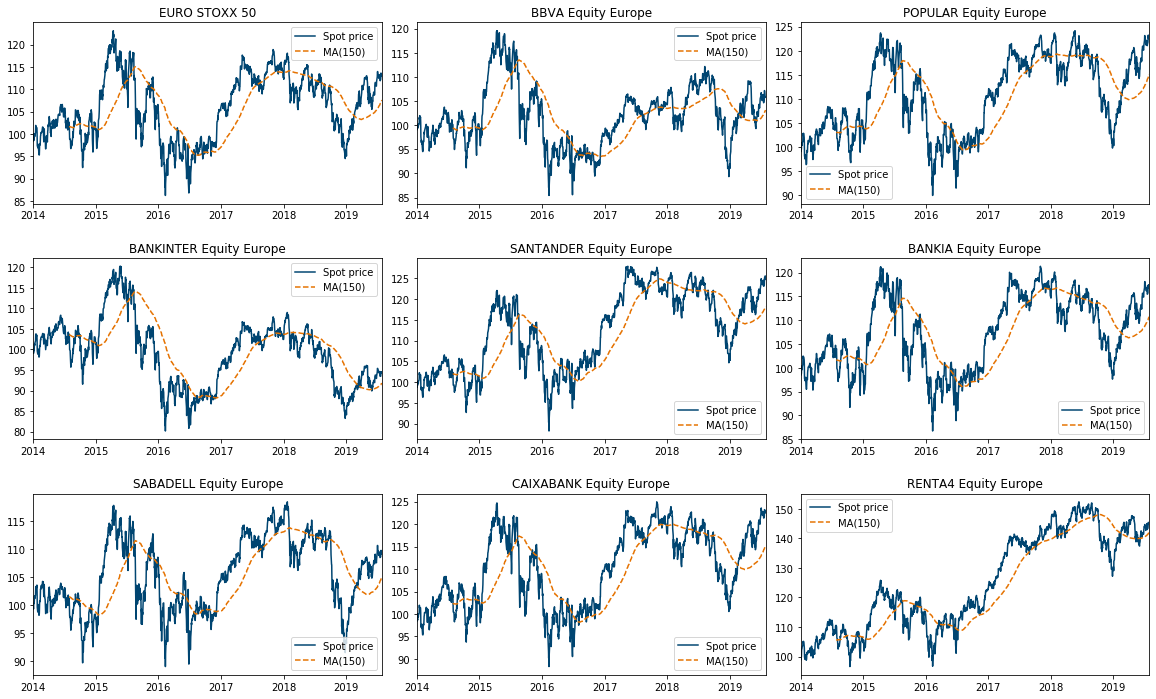

In [11]:
columns_name=df_europe_5Y.columns.values
columns_name_exdate=columns_name[1:10]
data_spot_MA=df_europe_5Y[columns_name_exdate].rolling(150).mean()
fig = plt.figure(figsize=(20,12))
fig.subplots_adjust(hspace=0.3, wspace=0.1)
for i in range(1, 10):
    pos=columns_name[i]
    media=data_spot_MA[pos]
    ax = fig.add_subplot(3, 3,i)
    plt.plot(df_europe_5Y["DATES"],df_europe_5Y.iloc[:,[i]],'#004571',label='Spot price')
    plt.plot(df_europe_5Y["DATES"],media,'#E57200',linestyle='--',label="MA(150)")
    plt.legend(loc='best')
    plt.margins(x=0)
    ax.set_title(columns_name[i])

## <font color=#004571>3.1 All the Indices vs Eurostoxx 50

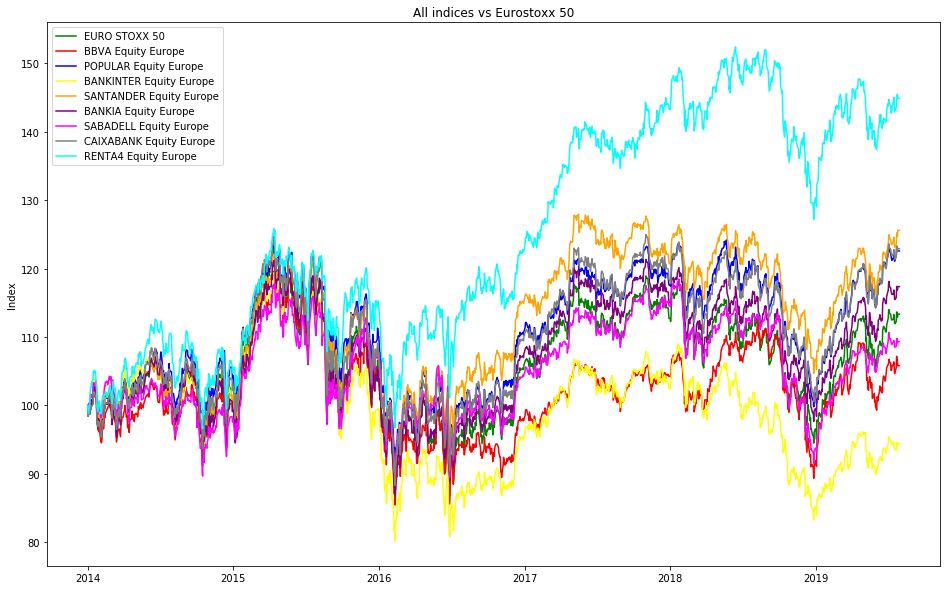

In [12]:
columns_name=df_europe_5Y.columns.values
columns_name_exdate=columns_name[1:10]
fig = plt.figure(figsize=(16,10))
fig.subplots_adjust(hspace=0.3, wspace=0.1)
colors=[0,'green', 'red', 'blue', 'yellow', 'orange', 'purple', 'magenta', 'gray', 'cyan']
              
ax = fig.add_subplot(1, 1,1)
for i in range (1,10):

    plt.plot(df_europe_5Y["DATES"],df_europe_5Y.iloc[:,[i]],colors[i],label=columns_name[i])
    plt.legend(loc='best')
    plt.ylabel('Index')
    plt.title('All indices vs Eurostoxx 50')

* We are going to focus all the analysis in the 5 year term. This its a reasonable window for the active management inside the mutual fund industries...all the calculation are made with this temporal horizon. In this chart we can compare the differents funds in index numbers (january 2014=100),  We can see that all the funds have more and less the same behaviour except the RENTA 4 fund. 


* Renta 4 has a incredible generation of alfa during this period, there are other funds with positive alfa as SANTANDER but this its not enought to affirm that both funds  are a good active funds...we need to examine his stadistical behaviour...

## <font color=#E57200>4. Three Years:

In [13]:
df_europe_3Y.describe()

EURO STOXX 50  BBVA Equity Europe  POPULAR Equity Europe  \
count     933.000000          933.000000             933.000000   
mean      101.034505           96.628227             101.729207   
std         7.094406            5.339581               7.477485   
min        82.030102           81.879869              81.728919   
25%        93.895370           91.993704              94.151175   
50%       102.999217           97.386841             104.219537   
75%       106.806385          100.596155             108.048924   
max       113.156155          107.496059             112.840384   

       BANKINTER Equity Europe  SANTANDER Equity Europe  BANKIA Equity Europe  \
count               933.000000               933.000000            933.000000   
mean                 96.438272               107.165980            104.366590   
std                   6.827906                 8.427435              7.714494   
min                  80.534659                81.882890             83.450930   
25%                  90.139249                99.496501             96.615397   
50%                  96.333742               109.821905            106.758288   
75%                 102.892007               114.090005            110.840282   
max                 109.515004               118.708109            116.752419   

       SABADELL Equity Europe  CAIXABANK Equity Europe  RENTA4 Equity Europe  
count              933.000000               933.000000            933.000000  
mean                98.775657               103.863321            116.309318  
std                  6.020113                 8.044965             12.407593  
min                 82.754228                82.101039             84.599519  
25%                 93.121160                95.843952            104.098956  
50%                 99.867046               106.499162            121.228036  
75%                104.022421               110.791221            125.701224  
max                110.155497               116.206800            133.300751

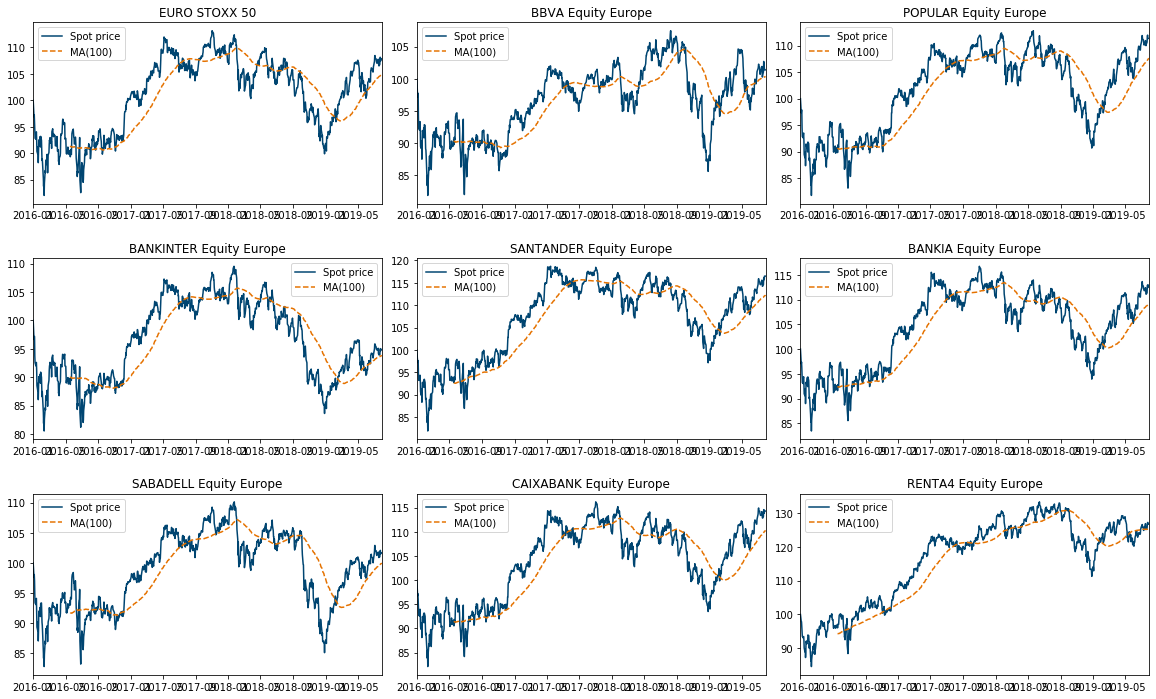

In [14]:
columns_name=df_europe_3Y.columns.values
columns_name_exdate=columns_name[1:10]
data_spot_MA=df_europe_3Y[columns_name_exdate].rolling(100).mean()
fig = plt.figure(figsize=(20,12))
fig.subplots_adjust(hspace=0.3, wspace=0.1)
for i in range(1, 10):
    pos=columns_name[i]
    media=data_spot_MA[pos]
    ax = fig.add_subplot(3, 3,i)
    plt.plot(df_europe_3Y["DATES"],df_europe_3Y.iloc[:,[i]],'#004571',label='Spot price')
    plt.plot(df_europe_3Y["DATES"],media,'#E57200',linestyle='--',label="MA(100)")
    plt.legend(loc='best')
    plt.margins(x=0)
    ax.set_title(columns_name[i])

## <font color=#004571>4.1 All the Indices vs Eurostoxx 50

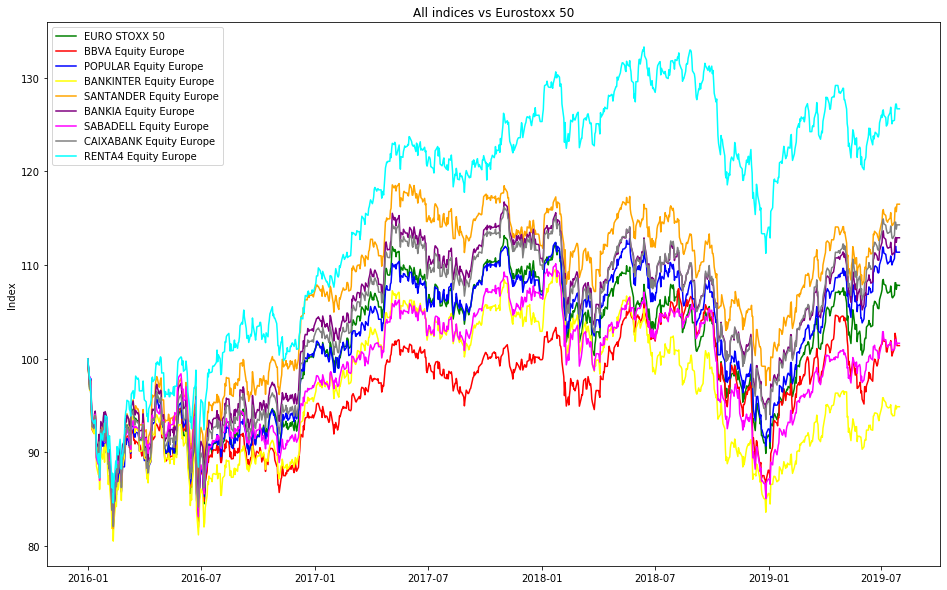

In [15]:
columns_name=df_europe_3Y.columns.values
columns_name_exdate=columns_name[1:10]
fig = plt.figure(figsize=(16,10))
fig.subplots_adjust(hspace=0.3, wspace=0.1)
colors=[0,'green', 'red', 'blue', 'yellow', 'orange', 'purple', 'magenta', 'gray', 'cyan']
              
ax = fig.add_subplot(1, 1,1)
for i in range (1,10):

    plt.plot(df_europe_3Y["DATES"],df_europe_3Y.iloc[:,[i]],colors[i],label=columns_name[i])
    plt.legend(loc='best')
    plt.ylabel('Index')
    plt.title('All indices vs Eurostoxx 50')

## <font color=#E57200>5. One Year:

In [16]:
df_europe_1Y.describe()

EURO STOXX 50  BBVA Equity Europe  POPULAR Equity Europe  \
count     412.000000          412.000000             412.000000   
mean       96.145691           99.832720              98.390033   
std         4.424723            4.371747               4.801967   
min        83.829724           85.706787              84.859305   
25%        93.833548           97.032614              95.847632   
50%        97.065320          100.055838              99.550812   
75%        99.308069          103.464783             102.124731   
max       104.803993          107.602092             105.601619   

       BANKINTER Equity Europe  SANTANDER Equity Europe  BANKIA Equity Europe  \
count               412.000000               412.000000            412.000000   
mean                 93.958001                98.549597             96.769352   
std                   5.998384                 4.080676              4.253070   
min                  81.237122                86.659570             84.851398   
25%                  88.783488                96.103335             94.261492   
50%                  93.592088                99.461967             97.690544   
75%                  99.108536               101.788624            100.028352   
max                 106.398211               104.681701            104.413052   

       SABADELL Equity Europe  CAIXABANK Equity Europe  RENTA4 Equity Europe  
count              412.000000               412.000000            412.000000  
mean                94.037137                97.481393            100.378585  
std                  4.939029                 4.509509              3.569364  
min                 79.881658                85.001754             88.774412  
25%                 90.814908                94.906655             98.119468  
50%                 94.845197                98.388107            100.588846  
75%                 97.712122               100.823096            103.265036  
max                103.444013               104.737382            106.358158

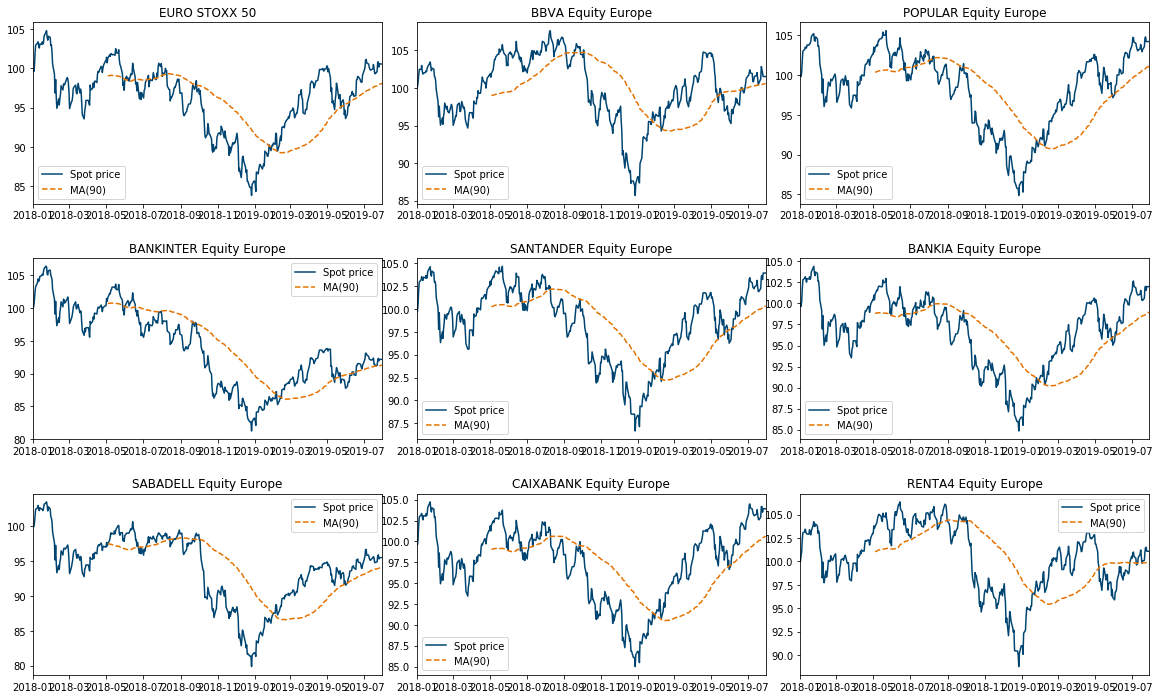

In [17]:
columns_name=df_europe_1Y.columns.values
columns_name_exdate=columns_name[1:10]
data_spot_MA=df_europe_1Y[columns_name_exdate].rolling(90).mean()
fig = plt.figure(figsize=(20,12))
fig.subplots_adjust(hspace=0.3, wspace=0.1)
for i in range(1, 10):
    pos=columns_name[i]
    media=data_spot_MA[pos]
    ax = fig.add_subplot(3, 3,i)
    plt.plot(df_europe_1Y["DATES"],df_europe_1Y.iloc[:,[i]],'#004571',label='Spot price')
    plt.plot(df_europe_1Y["DATES"],media,'#E57200',linestyle='--',label="MA(90)")
    plt.legend(loc='best')
    plt.margins(x=0)
    ax.set_title(columns_name[i])

## <font color=#004571>5.1 All the Indices vs Eurostoxx 50

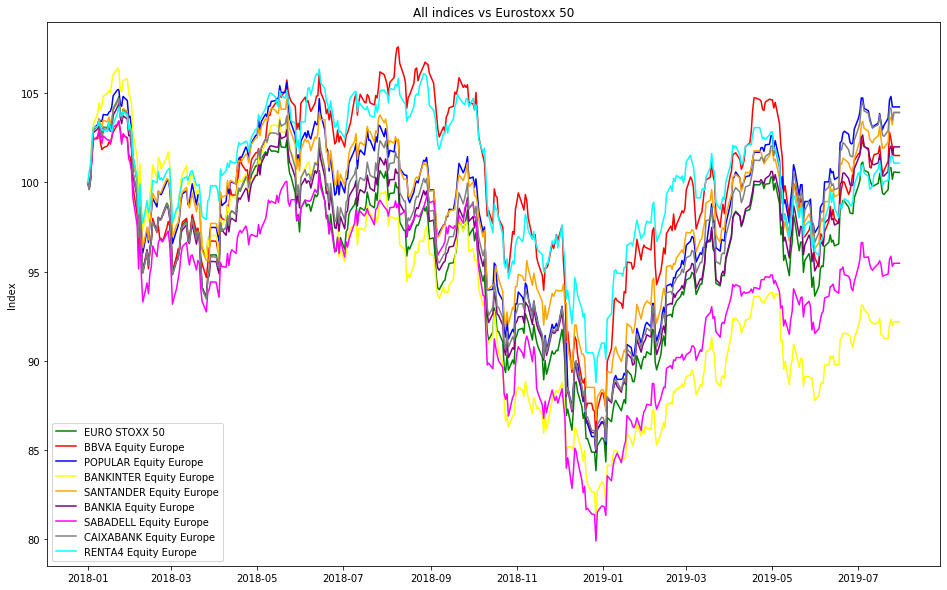

In [52]:
columns_name=df_europe_1Y.columns.values
columns_name_exdate=columns_name[1:10]
fig = plt.figure(figsize=(16,10))
fig.subplots_adjust(hspace=0.3, wspace=0.1)
colors=[0,'green', 'red', 'blue', 'yellow', 'orange', 'purple', 'magenta', 'gray', 'cyan']
              
ax = fig.add_subplot(1, 1,1)
for i in range (1,10):

    plt.plot(df_europe_1Y["DATES"],df_europe_1Y.iloc[:,[i]],colors[i],label=columns_name[i])
    plt.legend(loc='best')
    plt.ylabel('Index')
    plt.title('All indices vs Eurostoxx 50')

## <font color=#E57200>6. YTD: Year To Date

In [19]:
df_europe_YTD.describe()

EURO STOXX 50  BBVA Equity Europe  POPULAR Equity Europe  \
count     151.000000          151.000000             151.000000   
mean      111.389642          112.103031             113.030051   
std         4.874488            3.894429               5.604553   
min        98.442071           99.069407              98.506804   
25%       108.852643          109.998568             109.518547   
50%       112.272858          112.308293             114.274947   
75%       115.450020          114.834707             117.734822   
max       118.082441          118.770808             121.081210   

       BANKINTER Equity Europe  SANTANDER Equity Europe  BANKIA Equity Europe  \
count               151.000000               151.000000            151.000000   
mean                107.668493               110.703433            111.224840   
std                   3.360778                 4.508749              4.839784   
min                  98.677226                98.604477             98.874163   
25%                 105.855493               108.181299            108.406727   
50%                 107.898212               111.426812            111.908223   
75%                 110.542924               114.389325            115.571469   
max                 112.778545               117.618926            118.686048   

       SABADELL Equity Europe  CAIXABANK Equity Europe  RENTA4 Equity Europe  
count              151.000000               151.000000            151.000000  
mean               112.056043               112.208417            108.902471  
std                  4.353613                 5.481191              2.737935  
min                 99.362013                98.453598             99.001629  
25%                110.000229               108.866222            107.459145  
50%                113.334519               113.268556            109.253331  
75%                115.232443               116.777643            110.907918  
max                118.058521               120.351854            113.281434

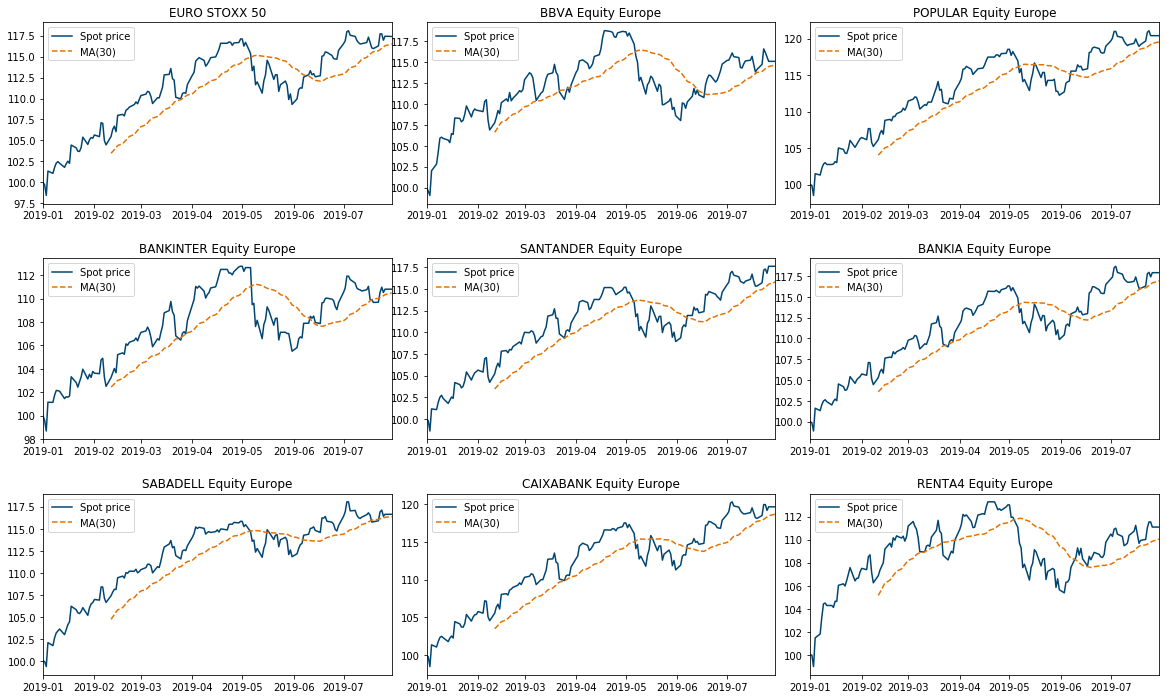

In [20]:
columns_name=df_europe_YTD.columns.values
columns_name_exdate=columns_name[1:10]
data_spot_MA=df_europe_YTD[columns_name_exdate].rolling(30).mean()
fig = plt.figure(figsize=(20,12))
fig.subplots_adjust(hspace=0.3, wspace=0.1)
for i in range(1, 10):
    pos=columns_name[i]
    media=data_spot_MA[pos]
    ax = fig.add_subplot(3, 3,i)
    plt.plot(df_europe_YTD["DATES"],df_europe_YTD.iloc[:,[i]],'#004571',label='Spot price')
    plt.plot(df_europe_YTD["DATES"],media,'#E57200',linestyle='--',label="MA(30)")
    plt.legend(loc='best')
    plt.margins(x=0)
    ax.set_title(columns_name[i])

## <font color=#004571>6.1 All the Indices vs Eurostoxx 50

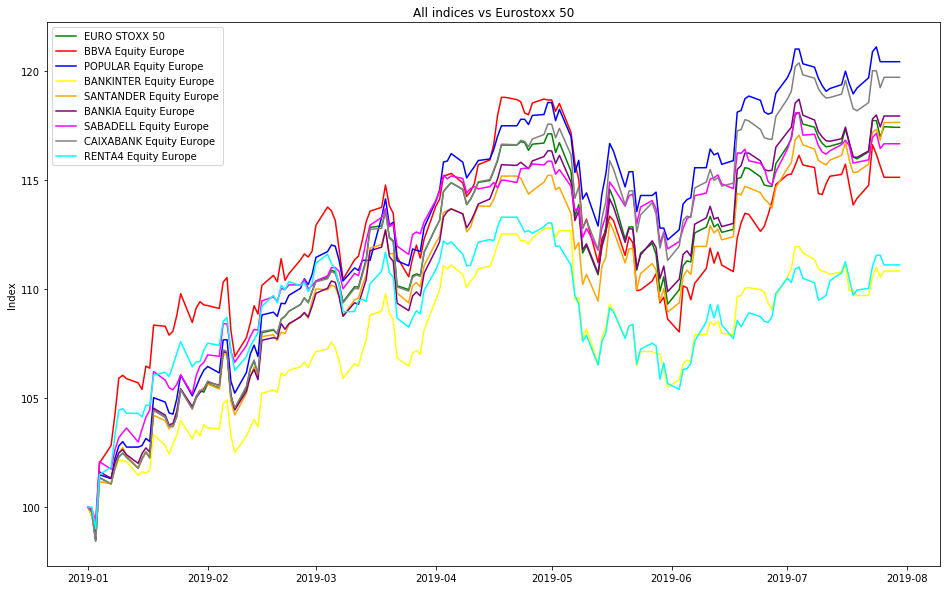

In [21]:
columns_name=df_europe_YTD.columns.values
columns_name_exdate=columns_name[1:10]
fig = plt.figure(figsize=(16,10))
fig.subplots_adjust(hspace=0.3, wspace=0.1)
colors=[0,'green', 'red', 'blue', 'yellow', 'orange', 'purple', 'magenta', 'gray', 'cyan']
              
ax = fig.add_subplot(1, 1,1)
for i in range (1,10):

    plt.plot(df_europe_YTD["DATES"],df_europe_YTD.iloc[:,[i]],colors[i],label=columns_name[i])
    plt.legend(loc='best')
    plt.ylabel('Index')
    plt.title('All indices vs Eurostoxx 50')

# <font color=#004571>2. Transform the 5Y dataset in daily returns to make the stadistical analyst


In [22]:
data_returns=df_europe_5Y
for i in range(1,10):
    df_europe_5Y[columns_name[i]]= data_returns[columns_name[i]].pct_change(1)
data_returns=data_returns.dropna()

In [23]:
data_returns.head()

DATES  EURO STOXX 50  BBVA Equity Europe  POPULAR Equity Europe  \
1 2014-01-02      -0.015783           -0.009649              -0.010056   
2 2014-01-03       0.004739            0.005317               0.005437   
3 2014-01-06      -0.001714           -0.002084               0.000000   
4 2014-01-07       0.013619            0.008518               0.011826   
5 2014-01-08      -0.000096            0.000418               0.002486   

   BANKINTER Equity Europe  SANTANDER Equity Europe  BANKIA Equity Europe  \
1                -0.009392                -0.012082             -0.015787   
2                 0.005696                 0.005483              0.005707   
3                 0.000684                -0.000006             -0.001763   
4                 0.012952                 0.008804              0.014326   
5                 0.003869                -0.000406              0.001613   

   SABADELL Equity Europe  CAIXABANK Equity Europe  RENTA4 Equity Europe  
1               -0.007195                -0.015890             -0.011445  
2                0.010270                 0.004594              0.000000  
3               -0.000376                -0.001892              0.012374  
4                0.008791                 0.013599              0.019529  
5                0.004722                -0.000290              0.005260

In [24]:
data_returns.describe()

EURO STOXX 50  BBVA Equity Europe  POPULAR Equity Europe  \
count    1454.000000         1454.000000            1454.000000   
mean        0.000144            0.000088               0.000188   
std         0.010781            0.009861               0.009823   
min        -0.086169           -0.084448              -0.070514   
25%        -0.005120           -0.004373              -0.004212   
50%         0.000255            0.000163               0.000000   
75%         0.005465            0.005070               0.005018   
max         0.047056            0.047333               0.040225   

       BANKINTER Equity Europe  SANTANDER Equity Europe  BANKIA Equity Europe  \
count              1454.000000              1454.000000           1454.000000   
mean                  0.000012                 0.000206              0.000165   
std                   0.010087                 0.009890              0.010474   
min                  -0.087759                -0.077100             -0.083487   
25%                  -0.004535                -0.004195             -0.004778   
50%                   0.000083                 0.000169              0.000197   
75%                   0.004979                 0.005116              0.005210   
max                   0.043944                 0.044879              0.048286   

       SABADELL Equity Europe  CAIXABANK Equity Europe  RENTA4 Equity Europe  
count             1454.000000              1454.000000           1454.000000  
mean                 0.000107                 0.000200              0.000296  
std                  0.009538                 0.010730              0.009080  
min                 -0.089760                -0.086153             -0.078490  
25%                 -0.004337                -0.004879             -0.003916  
50%                  0.000368                 0.000183              0.000247  
75%                  0.004848                 0.005386              0.005145  
max                  0.043944                 0.047381              0.035487

* We need to transform the dataset into daily returns to analyse the statistical metrics, if we make the analysis directly with the number we are making a big mistake and wasting our time...

* In this table we can see the mean, differents percentiles and the standard desviation.

# <font color=#004571>3. Correlation Eurostoxx 50 vs Active Mutual Funds (5 Year Window)


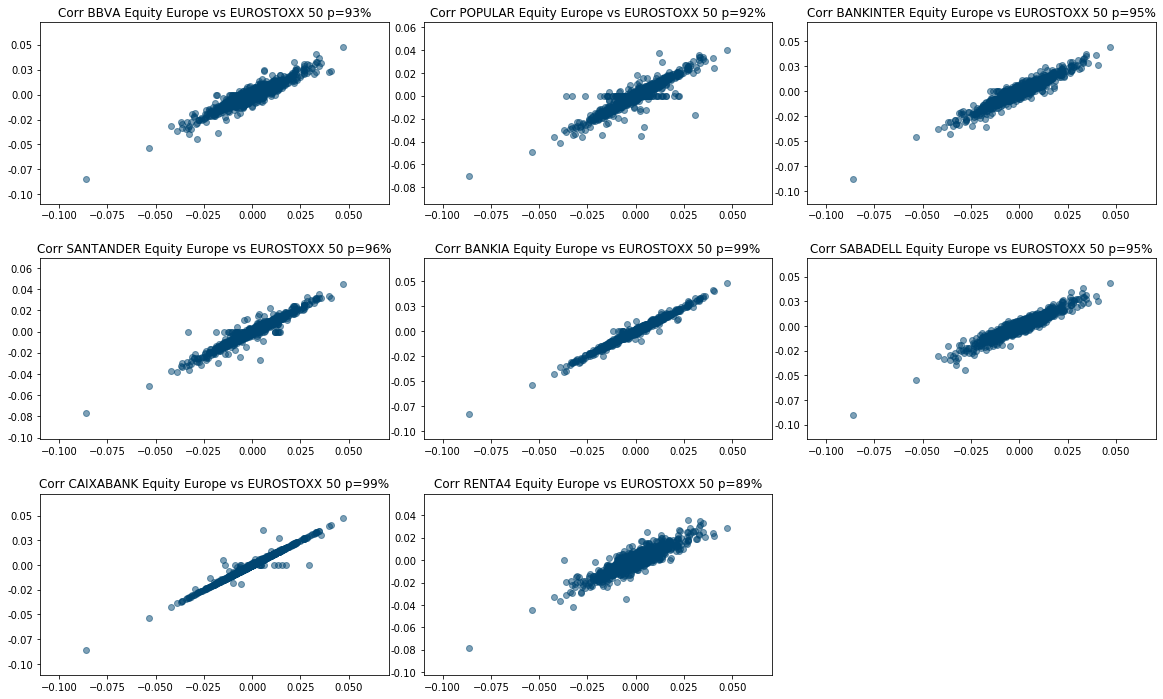

In [25]:
pearson = list()
fig = plt.figure(figsize=(20,12))
colors='#004571'
fig.subplots_adjust(hspace=0.3, wspace=0.1)
for i in range(2, 10):
    ax = fig.add_subplot(3, 3,i-1)
    pos=columns_name[i]
    retorno=data_returns[pos]
    plt.scatter(x=data_returns["EURO STOXX 50"],y=retorno,c=colors,alpha=0.5)
    plt.margins(x=0.1)
    x=data_returns["EURO STOXX 50"]
    y=retorno
    r,p=pearsonr(x,y)
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax.set_title("Corr " + pos + " vs EUROSTOXX 50 p=" + str("{0:.0%}".format(round(r,3))))
    pearson.append(r)


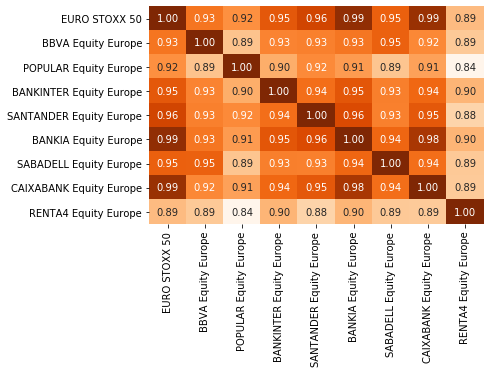

In [26]:
fig, ax = plt.subplots()
sns.heatmap(data_returns.corr(method='pearson'), annot=True, fmt='.2f', 
            cmap=plt.get_cmap('Oranges'), cbar=False, ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation="horizontal")
plt.savefig('Corr.png', bbox_inches='tight', pad_inches=0.00)

* The correlation between the Euro Stoxx 50 and the rest of the mutual funds are very high. The pearson ratio is higher than 90% for the vast majority, this factor its very negative in our expectatives to find a good active funds, because if the movements in the prices are very similar its very complicated to have better results vs Benchmark...the unique fund that we can consider with some difference in the returns movements its RENTA4 but we need to continue the analysis...

# <font color=#004571>4. Evolution in the correlation a long time. ¿It's consistent the correlation ratios?

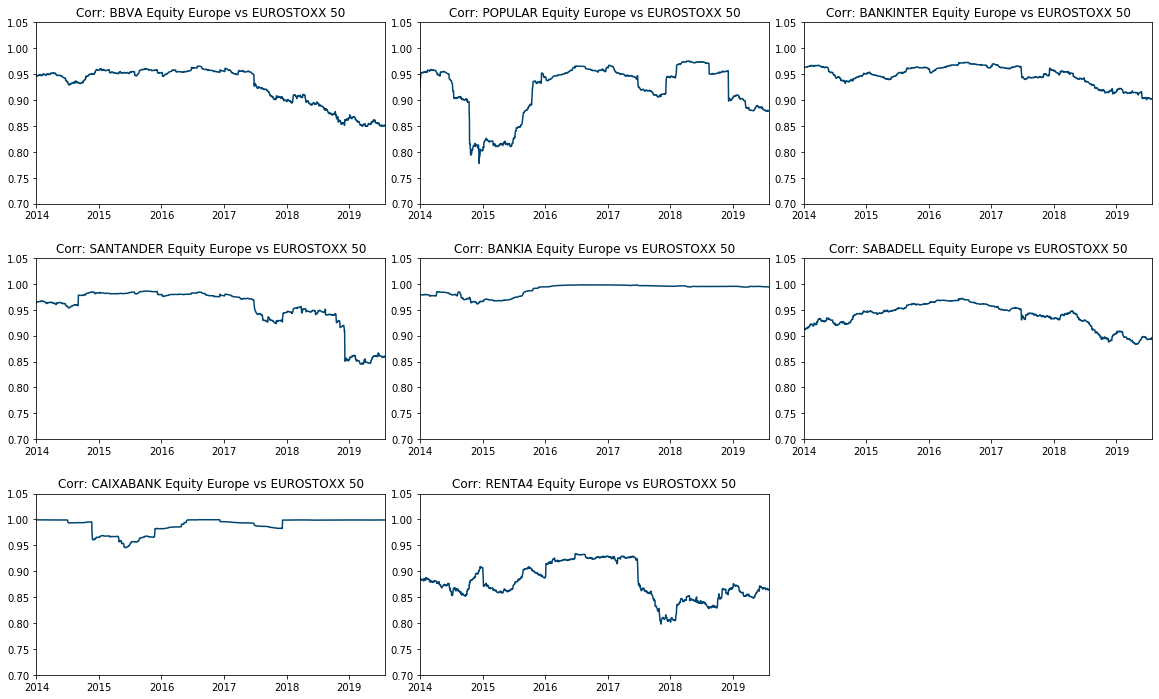

In [53]:
fig = plt.figure(figsize=(20,12))
fig.subplots_adjust(hspace=0.3, wspace=0.1)
for i in range(1, 9):
    ax = fig.add_subplot(3, 3,i)
    plt.plot(df_europe_corr["DATES"],df_europe_corr.iloc[:,[i]],'#004571')
    plt.margins(x=0)
    plt.ylim([0.7, 1.05])
    ax.set_title("Corr: " + columns_name[i+1] + " vs EUROSTOXX 50")

* In this chart we can see the correlation not only in a point of time but in a historical range...we can see more and less the same conclusion from the previous step, but here there are two funds (SANTANDER and RENTA4) that can have at least during several time  less correlations, this it's good in terms of active manegement.

# <font color=#004571>5.Histogram returns and Value at Risk (VAR 95%)

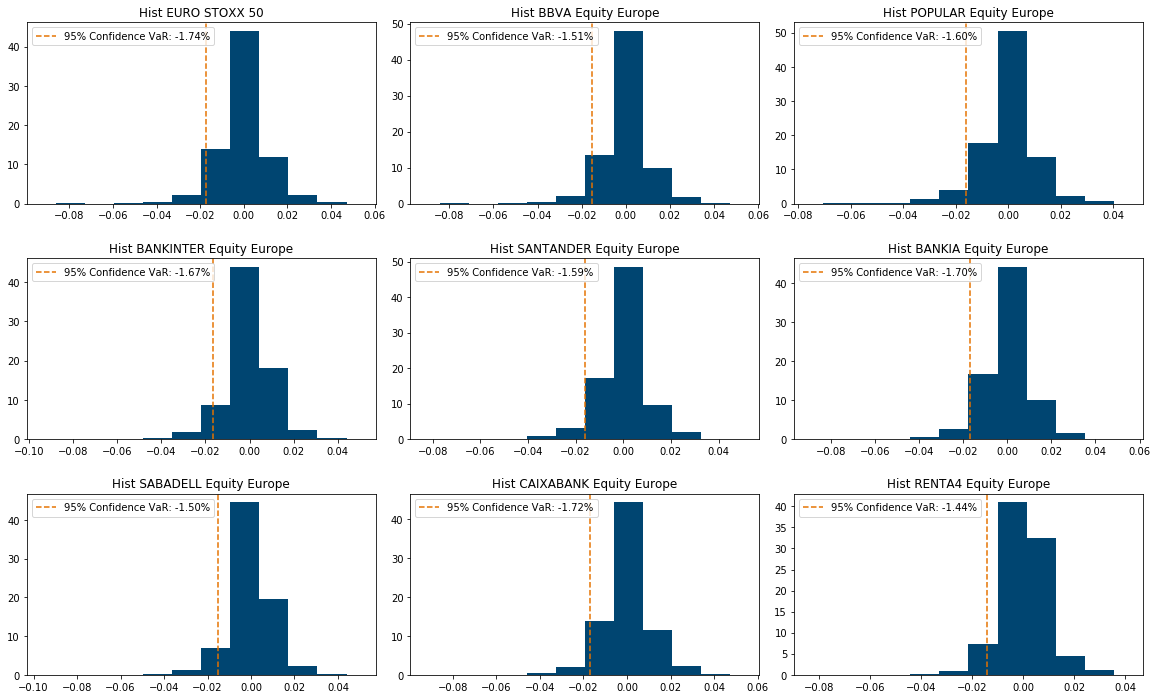

In [54]:
var = list()
warnings.filterwarnings("ignore")
fig = plt.figure(figsize=(20,12))
fig.subplots_adjust(hspace=0.3, wspace=0.1)
for i in range(1, 10):
    colors1='#004571'
    colors2='#E57200'
    ax = fig.add_subplot(3, 3,i)
    pos=columns_name[i]
    retorno=data_returns[pos]
    mu=retorno.mean()
    std=statistics.stdev(retorno)
    y=norm.pdf(20, mu, std)
    sorted_rets = sorted(retorno)
    plt.hist(sorted_rets,color=colors1,normed=True)
    varg = np.percentile(sorted_rets, 5)
    plt.axvline(x=varg, color=colors2, linestyle='--', label='95% Confidence VaR: ' + "{0:.2f}%".format(varg * 100))
    plt.legend(loc='best')
    plt.margins(x=0.1)
    ax.set_title("Hist " + pos)
    var.append(varg * 100)

*The frequency histogram are very similar in all the funds except in the RENTA4 fund, this fund has more positive tails than the others distributions and at the same time has a lower VAR ratio...this suppose a important difference and its a very important caracteristic in the active mutual funds...

# <font color=#004571>6. Boxplot (How it's the behavior of the returns? Tend to zero?)

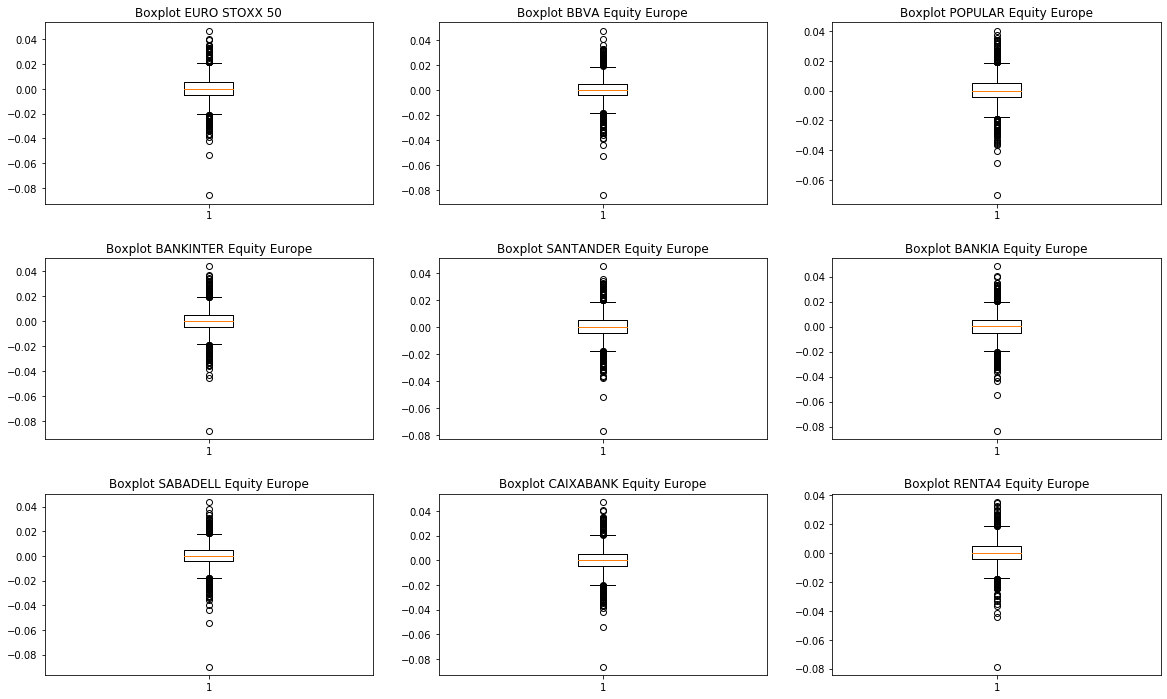

In [30]:
fig = plt.figure(figsize=(20,12))
colors='#004571'
fig.subplots_adjust(hspace=0.3, wspace=0.2)
for i in range(1, 10):
    pos=columns_name[i]
    ax = fig.add_subplot(3, 3,i)
    plt.boxplot(data_returns[pos])
    ax.set_title("Boxplot " + columns_name[i])


*The boxplot chart it's very useful to see how is the daily returns behavior. In our analysis we can see that almost all the funds has the same returns with a very similar interquartile range...this its very negative in terms of find active funds...due to his behaviour its the same than the benchmark index...

# <font color=#004571> 7. Linear Regression between Eurostoxx 50 vs Active Mutual Funds

In [32]:
dataX=data_returns[['EURO STOXX 50']]

In [33]:
X_train = np.array(dataX)
y_train = data_returns['BBVA Equity Europe'].values

In [34]:
regr = linear_model.LinearRegression(fit_intercept=False)

In [35]:
fit=regr.fit(X_train, y_train)

In [36]:
y_pred = regr.predict(X_train)

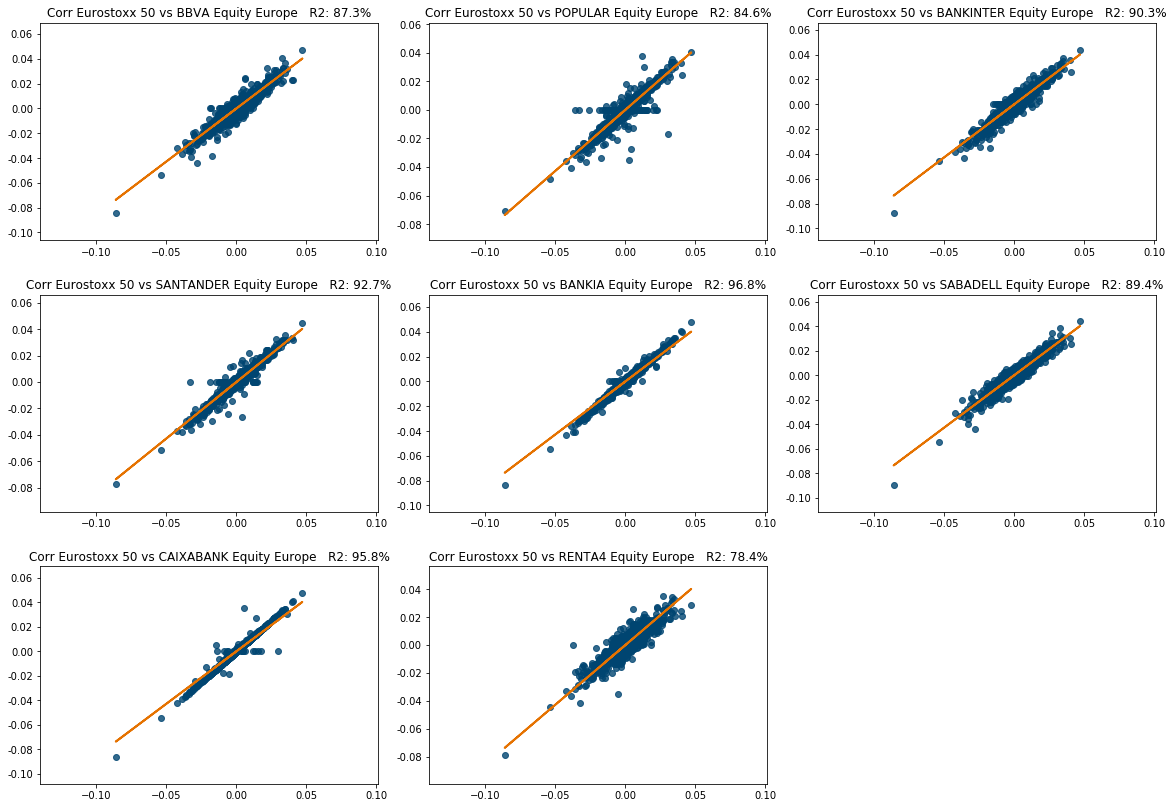

In [44]:
r2 = list()
b=data_returns.columns[1:].values
fig = plt.figure(figsize=(20,14))
fig.subplots_adjust(hspace=0.25, wspace=0.15)
for i in range(1, 9):
    ax = fig.add_subplot(3, 3,i)
    posi=b[i]
    y_train=data_returns[posi].values
    colors='#004571'
    colors2='#E57200'
    r2_=round(r2_score(y_train, y_pred),3)*100
    plt.scatter(X_train,y_train,c=colors,alpha=0.8)
    plt.plot(X_train, y_pred, c=colors2, linewidth=2)
    plt.margins(x=0.3)
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax.set_title("Corr Eurostoxx 50 vs " + b[i] + "   R2: " + str(round(r2_,2)) + "%")
    r2.append(r2_)

*All the funds have a very high correlation and R2 ratio, and we can see clearly that the movements in his returns are very similar at the Euro Stoxx 50 daily returns...this give an idea about the active management grade...only the RENTA4 has a ratio lower than 80%.

# <font color=#004571> 8. Tracking Error Eurostoxx 50 vs Active Mutual Funds

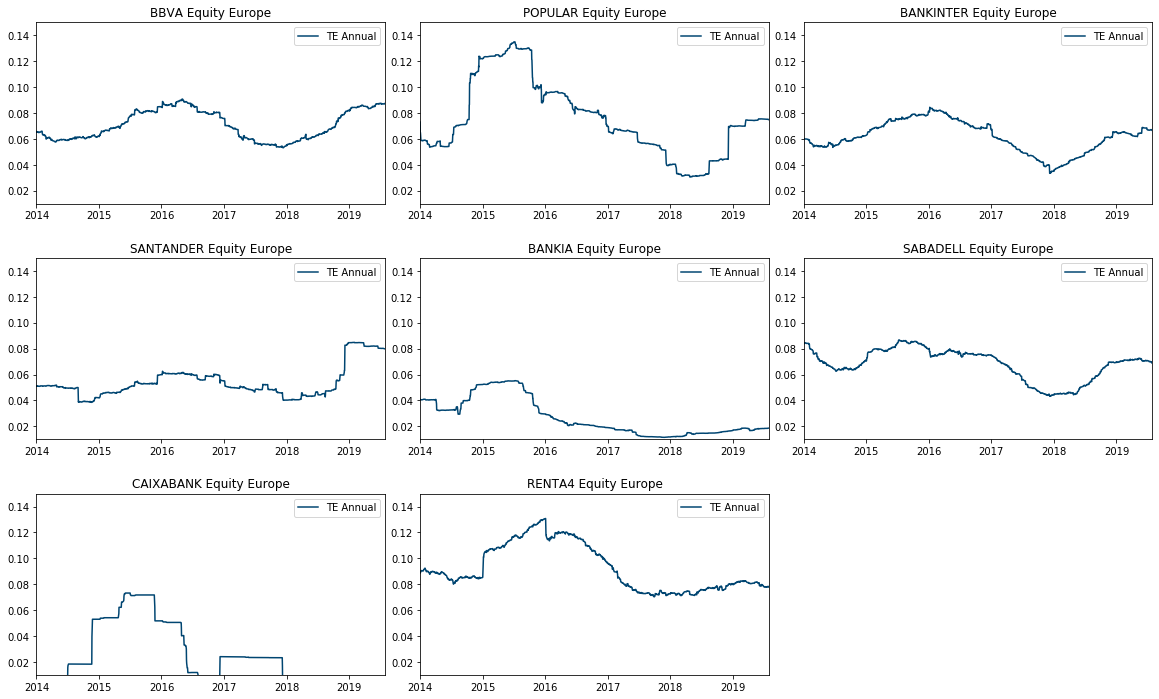

In [38]:
columns_name=df_europe_TE.columns.values
columns_name_exdate=columns_name[1:10]
fig = plt.figure(figsize=(20,12))
fig.subplots_adjust(hspace=0.3, wspace=0.1)
for i in range(1, 9):
    pos=columns_name[i]
    ax = fig.add_subplot(3, 3,i)
    plt.plot(df_europe_TE["DATES"],df_europe_TE.iloc[:,[i]],'#004571',label='TE Annual')
    plt.legend(loc='best')
    plt.margins(x=0)
    plt.ylim([0.01,0.15])
    ax.set_title(columns_name[i])

*Normally for consider a fund as active management performance the Track error ratio needs to be higher than 6%. If we keep this idea in our mind and see the results of our analysis immediately stand out the CAIXABANK and rhe BANKIA funds because his Tracking Error ratio are close to 02...in opposite we have the Renta4 fund with a TE ratio higher than 8% given us a clearly idea about his active performance...

# <font color=#004571> 9. Sharpe Ratio

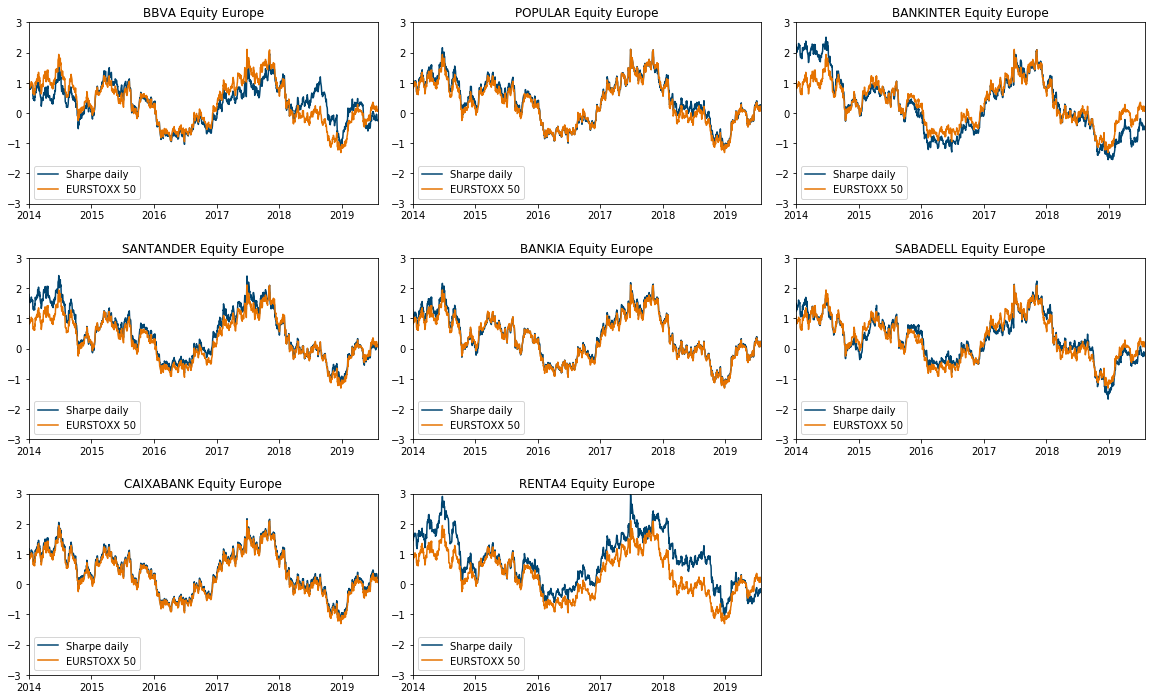

In [39]:
columns_name=df_europe_sharpe.columns.values
columns_name_exdate=columns_name[1:10]
fig = plt.figure(figsize=(20,12))
fig.subplots_adjust(hspace=0.3, wspace=0.1)
for i in range(1, 9):
    pos=columns_name[i]
    ax = fig.add_subplot(3, 3,i)
    plt.plot(df_europe_sharpe["DATES"],df_europe_sharpe.iloc[:,[i+1]],'#004571',label='Sharpe daily')
    plt.plot(df_europe_sharpe["DATES"],df_europe_sharpe["EURO STOXX 50"],'#E57200',label='EURSTOXX 50')
    plt.legend(loc='best')
    plt.margins(x=0)
    plt.ylim([-3,3])
    ax.set_title(columns_name[i+1])

* Almost the 100% of mutual funds have the same Sharpe ratio vs Eurostoxx 50 so the ratio return vs volatility its the same (so his return-risk performance its equal) this its a bad sigmal in terms of active management...but there are one fund that best this perfomance and get a better sharpe ratio: RENTA4, so this fund has better results in termns of returns asumming less risk...its clearly a example of active management.

# <font color=#004571> 10. Alfa Analysis
   

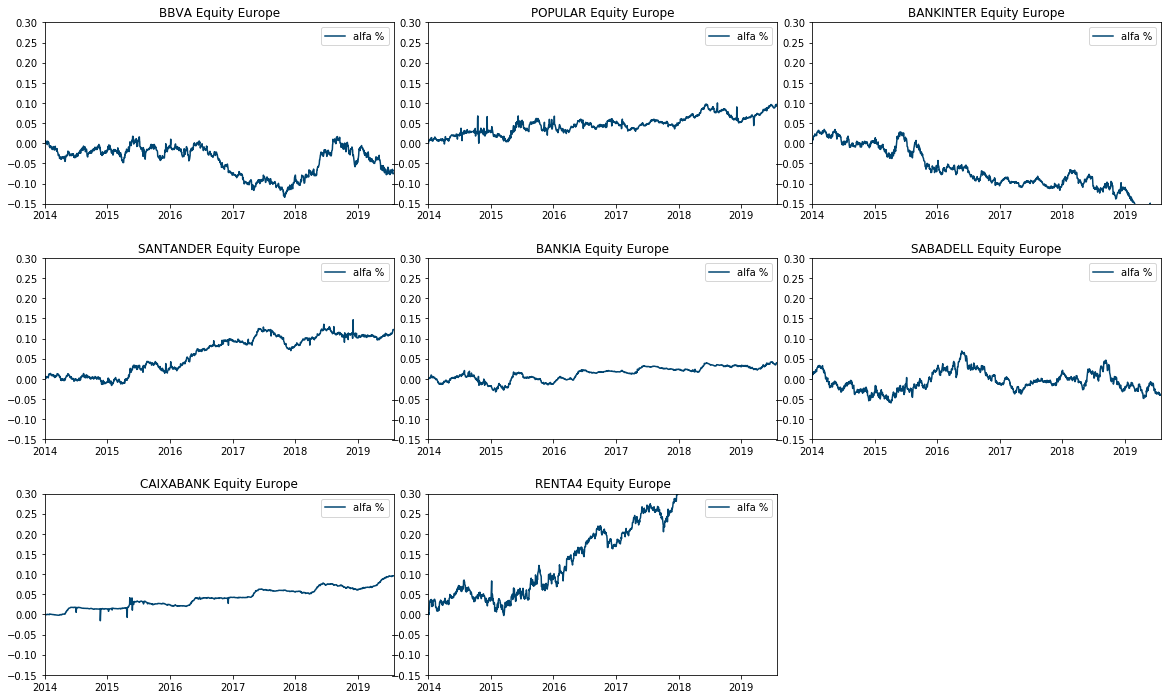

In [40]:
columns_name=df_europe_alfa.columns.values
columns_name_exdate=columns_name[1:10]
fig = plt.figure(figsize=(20,12))
fig.subplots_adjust(hspace=0.3, wspace=0.1)
for i in range(1, 9):
    pos=columns_name[i]
    ax = fig.add_subplot(3, 3,i)
    plt.plot(df_europe_alfa["DATES"],df_europe_alfa.iloc[:,[i]],'#004571',label='alfa %')
    plt.legend(loc='best')
    plt.ylim([-0.15,+0.3])
    plt.margins(x=0)
    ax.set_title(columns_name[i])

* There are only two mutual funds that can get a positive alfa: RENTA 4 and SANTANDER, the rest of the funds don't generates consistently alfa...so if we see the results we can afirm that only a minority of mutual funds can generate alfa.

# <font color=#004571> 11. Mutual Fund size vs Alfa

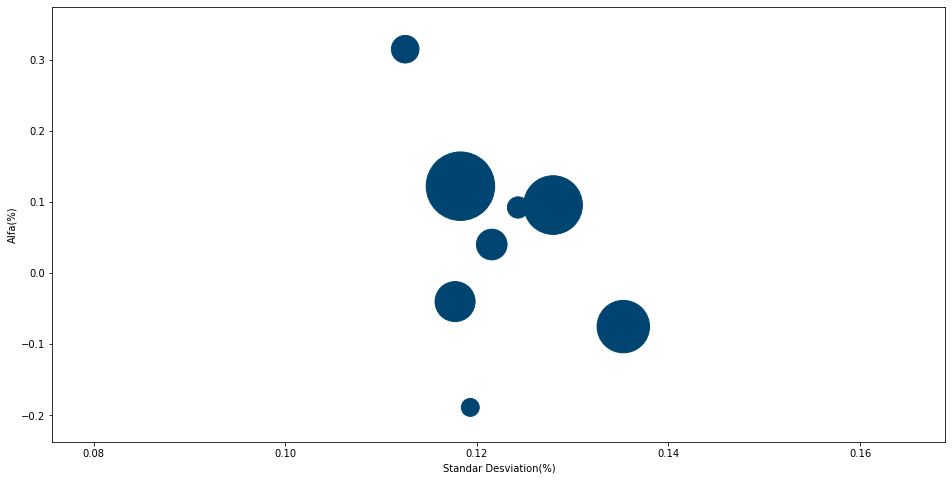

In [41]:
size=[2750.74,450.96,320.54,4690.56,940.16,1600.66,3440.12,760.16]
alfa=df_europe_alfa.iloc[1454,1:].values
a=df_europe_desvest.iloc[2496,2:]*math.sqrt(252)
desvest=a.values
fig = plt.figure(figsize=(16,8))
plt.scatter(desvest, alfa, s=size,color='#004571')
plt.xlabel("Standar Desviation(%)")
plt.ylabel("Alfa(%)")
plt.show()

* There is no lineal relation between volume and alfa generation and we can't find clearly relationships between the risk and the alfa generation, so the key factor is the chief economist knowledge abaout the differents sector and corporates

# <font color=#004571>Results and Discussion <a name="results"></a>

## <font color=#E57200>Summary Table:

After our analysis we can see the results in the summary table:

In [65]:
sharpe=df_europe_sharpe.iloc[1454,2:].values
TE=df_europe_TE.iloc[1454,1:].values

data_summary = {'Mutual Fund': [],'Alfa': [],'Standar-Desviation': [],'Sharpe-Ratio': [],'Track-Error-Ratio': [],'Pearson-Ratio': [],'R2-Ratio': [],'VAR95%-Ratio': []}


for i in range(0,8):
    
    data_summary['Mutual Fund'].append(columns_name_exdate[i+1])
    data_summary['Alfa'].append(alfa[i])
    data_summary['Standar-Desviation'].append(desvest[i])
    data_summary['Sharpe-Ratio'].append(sharpe[i])
    data_summary['Track-Error-Ratio'].append(TE[i])
    data_summary['Pearson-Ratio'].append(pearson[i])
    data_summary['R2-Ratio'].append(r2[i])   
    data_summary['VAR95%-Ratio'].append(var[i+1])

    
df_summary= pd.DataFrame(data_summary)  
df_summary.head(10)

Mutual Fund      Alfa  Standar-Desviation  Sharpe-Ratio  \
0       BBVA Equity Europe -0.075278            0.135290     -0.244579   
1    POPULAR Equity Europe  0.092391            0.124299      0.187279   
2  BANKINTER Equity Europe -0.188986            0.119315     -0.550266   
3  SANTANDER Equity Europe  0.122363            0.118286      0.105925   
4     BANKIA Equity Europe  0.040247            0.121554      0.139839   
5   SABADELL Equity Europe -0.040060            0.117728     -0.209338   
6  CAIXABANK Equity Europe  0.095792            0.127955      0.208462   
7     RENTA4 Equity Europe  0.315127            0.112520     -0.285242   

   Track-Error-Ratio  Pearson-Ratio  R2-Ratio  VAR95%-Ratio  
0           0.087285       0.934266      87.3     -1.514373  
1           0.074894       0.919829      84.6     -1.603305  
2           0.066357       0.951067      90.3     -1.668539  
3           0.079787       0.963157      92.7     -1.588134  
4           0.018571       0.990355      96.8     -1.695701  
5           0.068787       0.945945      89.4     -1.499833  
6           0.006922       0.986935      95.8     -1.716250  
7           0.077958       0.893857      78.4     -1.435818

## <font color=#E57200>Main Results:



**BBVA, SABADELL, BANKINTER:**

* This fund in the 5 year horizon dont seems to generate alfa, normally his returns are very similiar than the benchmark returns even has a worst behaviuor (alfa ratio negative).

* In other hand the pearson correlation with the benchmark is so high (higher than 90%) and the R2 ratio is in a similar level. 

* The Value at risk its almost equal vs Benchmark and happend the same with the return histogram.

* The track error is more and less a 6% and the sharpe ratio is normally worst than benchmark.


**SANTANDER, CAIXABANK,POPULAR,BANKIA:**

* This fund in the 5 year horizon  seems generate a bit of alfa, normally his returns are very similiar than the benchmark.

* In other hand the pearson correlation with the benchmark is so high (higher than 92%) and the R2 ratio is in a similar level. 

* The Value at risk its almost equal vs Benchmark and happend the same with the return histogram.

* The track error is more and less a 8% and the sharpe ratio is normally the same than benchmark.


**RENTA4:**

* This fund in the 5 year horizon  seems generate a lot of alfa, always his returns are better than the benchmark.

* In other hand the pearson correlation with the benchmark is lower that the rest of the mutual funds high and the R2 ratio is the lowest too.

* The Value at risk its almost very different vs Benchmark and happend the same with the return histogram, you can see a very different histogram form...

* The track error is sometimes higher than 10% and the sharpe ratio is with difference better vs benchmark (less risk better results).

# <font color=#004571>Conclusion <a name="conclusion"></a>

After analyser all the data and make a deep satatistical and visualization analyst we can conclude the next:

* **The vast majority of spanish mutual funds have the same behaviour vs benchmark, not only in his prices but in the performance of his returns....so this mutual funds must be consider as passive management and not worth pay highers commisions. We recommend to hire ETF before this funds.**


* **The Renta 4 fund, the small fund speaking in terms of volume has show a very different behaviour, improving considerably respect the benchmark. Is the only fund that shows clearly an active management improving sistematicaly an improvment respect the benchmark...so we can recommend this fund.**